# Generating insights from data

In [102]:
# Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [103]:
# Loading the data
df = pd.read_excel("data.xlsx")

# preview of the dataset
df.head

<bound method NDFrame.head of         School Students per school Students per teacher  \
0    Nomantown                500                   18    
1   Neighbor A                400                   16    
2   Neighbor B                700                   20    
3   Neighbor C                800                   20    
4  Developed A                500                   21    
5  Developed B                350                   23    
6  Developed C                400                   20    
7    Similar A                600                   22    
8    Similar B                500                   20    
9    Similar C                300                   18    

  Government spending on education per student (US $)  \
0                                              5000     
1                                              3000     
2                                              4000     
3                                              5500     
4                                  

### Data Cleaning

##### Missing values

In [104]:
# Lets check for missing values
df.isnull().sum()

School                                                 0
Students per school                                    0
Students per teacher                                   0
Government spending on education per student (US $)    0
Average international assessment score                 0
Category                                               0
dtype: int64

##### Data types

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   School                                               10 non-null     object
 1   Students per school                                  10 non-null     object
 2   Students per teacher                                 10 non-null     object
 3   Government spending on education per student (US $)  10 non-null     object
 4   Average international assessment score               10 non-null     object
 5   Category                                             10 non-null     object
dtypes: object(6)
memory usage: 612.0+ bytes


In [106]:
# Converting some column datatypes to int
df["Students per school"] = df["Students per school"].astype(int)
df["Students per teacher"] = df["Students per teacher"].astype(int)
df["Government spending on education per student (US $)"] = df["Government spending on education per student (US $)"].astype(int)
df["Average international assessment score"] = df["Average international assessment score"].astype(int)
df["School"] = df["School"].astype(str)

# check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   School                                               10 non-null     object
 1   Students per school                                  10 non-null     int32 
 2   Students per teacher                                 10 non-null     int32 
 3   Government spending on education per student (US $)  10 non-null     int32 
 4   Average international assessment score               10 non-null     int32 
 5   Category                                             10 non-null     object
dtypes: int32(4), object(2)
memory usage: 452.0+ bytes


In [107]:
# Renaming columns
df.rename(columns={
    "School": "School",
    "Government spending on education per student (US $)": "Spending per Student",
    "Average international assessment score": "Assessment Score"
}, inplace=True)

# Exploratory Data Analysis

#### Spending per Student vs. Assessment Score

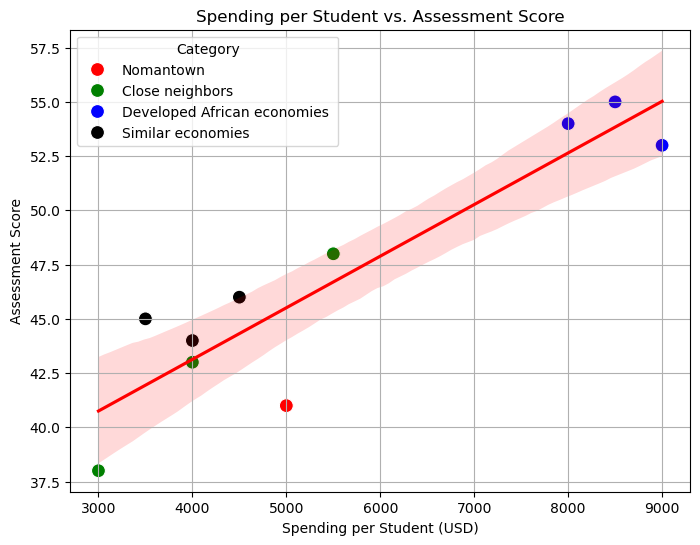

In [108]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["Spending per Student"], y=df["Assessment Score"], hue=df["Category"], palette=["Red", "Green", "blue", "black"], s=100)
sns.regplot(data=df, x="Spending per Student", y="Assessment Score", scatter=False, color='red')
plt.title("Spending per Student vs. Assessment Score")
plt.xlabel("Spending per Student (USD)")
plt.ylabel("Assessment Score")
plt.grid(True)
plt.show()

##### Insights
- From the graph, we can see the higher the **spending per student(USD)**, the higher the **assessment score** which can only be seen among the **Developed African Economies**.

In [109]:
# Extracting the needed columns
df_spending_assessment = df[["Category", "Spending per Student", "Assessment Score", "Students per school", "Students per teacher"]]

# Grouping by Category
df_spending_assessment = df_spending_assessment.groupby("Category").mean().reset_index().sort_values("Assessment Score", ascending= False)

df_spending_assessment.head()

,Category,Spending per Student,Assessment Score,Students per school,Students per teacher
1,Developed African economies,8500.000000,54.0,416.666667,21.333333
3,Similar economies,4000.000000,45.0,466.666667,20.000000
0,Close neighbors,4166.666667,43.0,633.333333,18.666667
2,Nomantown,5000.000000,41.0,500.000000,18.000000


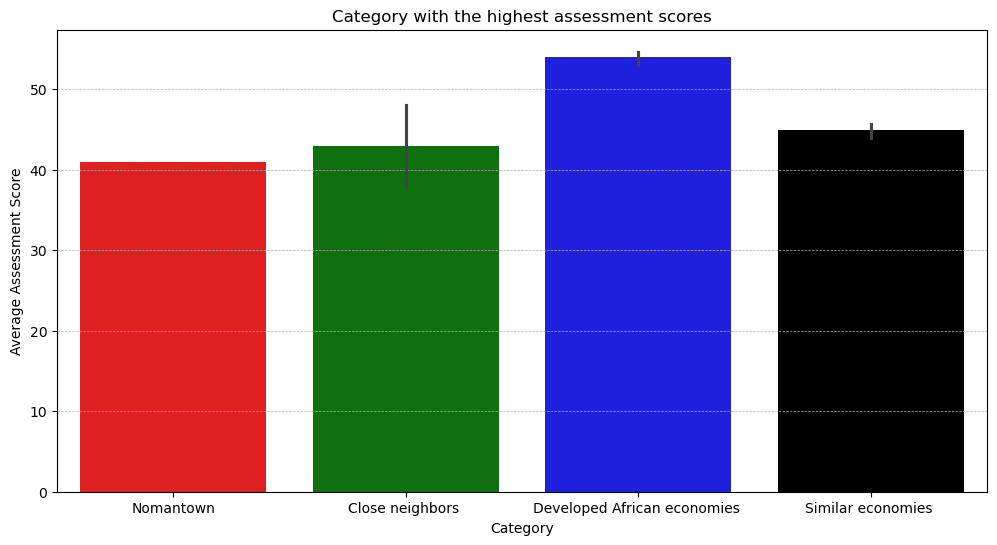

In [110]:
# Visualization
plt.figure(figsize = (12, 6))
sns.barplot(x= df["Category"], y= df["Assessment Score"], hue = df["Category"], palette=["Red", "Green", "blue", "black"])
plt.title("Category with the highest assessment scores")
plt.xlabel("Category")
plt.ylabel("Average Assessment Score")
plt.grid(axis = "y", linewidth = 0.5, linestyle="--")
plt.show()

##### Insights
- From the graph, we can see that **Developed African Economies** have on average the highest **assessment scores**.

#### Spending per Student and Assessment Scores

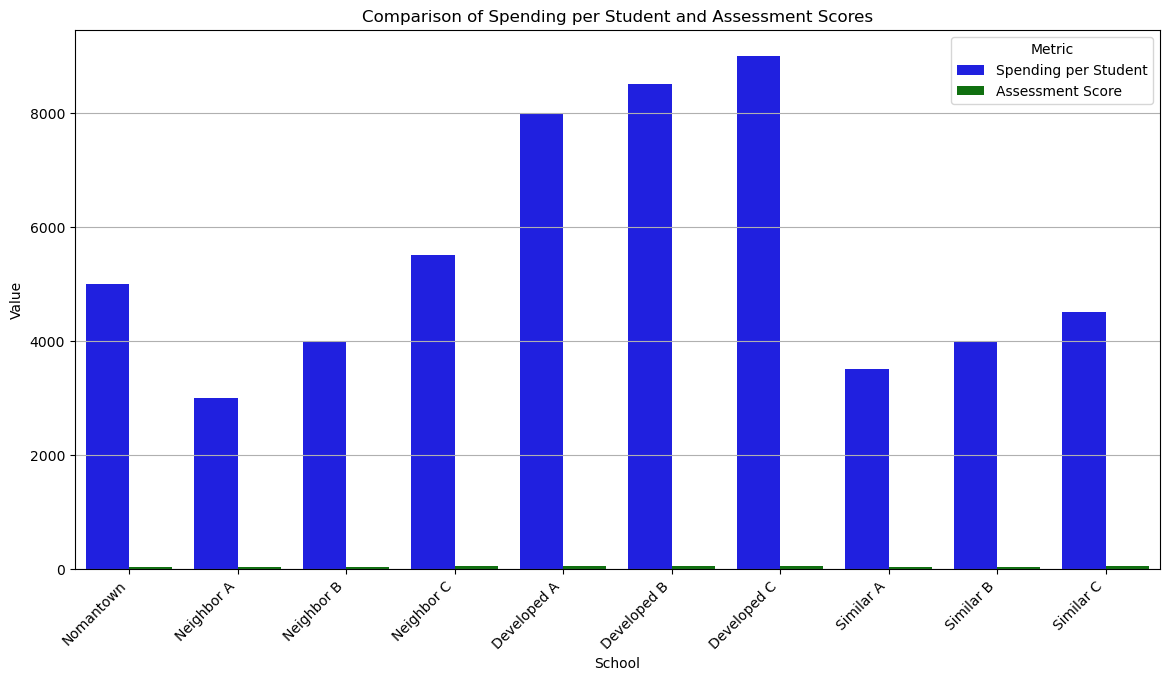

In [111]:
# Extracting columns needed
df_melt = df[["School", "Spending per Student", "Assessment Score"]]

# Convert to long format
df_melted = df_melt.melt(id_vars=["School"], var_name="Metric", value_name="Value")

plt.figure(figsize=(14, 7))
sns.barplot(data=df_melted, x="School", y="Value", hue="Metric", palette=["Blue", "green"], dodge=True)
plt.title("Comparison of Spending per Student and Assessment Scores")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Value")
plt.grid(axis="y")
plt.show()

##### Insights
- From the graph, we can see that School **Developed C** receives the highest level of funding of **9000** which can also be reflected by its high **assessment score** of **53**.
- Similarly School **Neighbor A** receives the lowest level of funding of **3000** which is refelcted with an **assessment score** of **38**.

#### Student-Teacher Ratio vs. Assessment Score

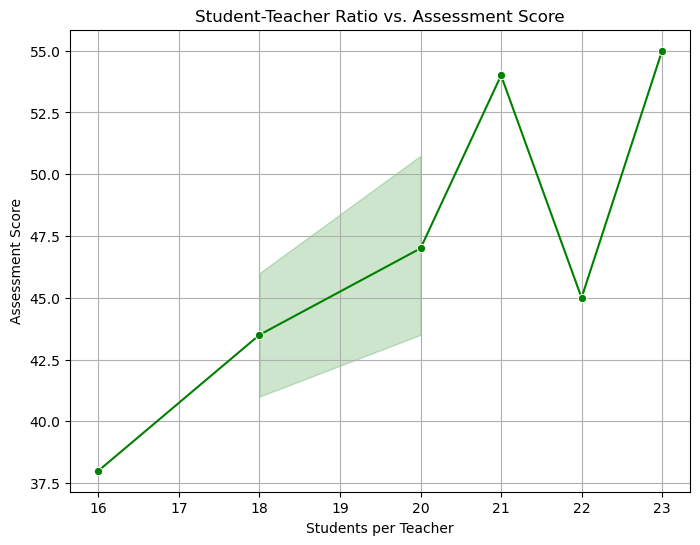

In [112]:
plt.figure(figsize=(8,6))
sns.lineplot(data=df, x="Students per teacher", y="Assessment Score", marker="o", color="green")
plt.title("Student-Teacher Ratio vs. Assessment Score")
plt.xlabel("Students per Teacher")
plt.ylabel("Assessment Score")
plt.grid(True)
plt.show()

##### Insights
- From the graph, we can see the higher the **Student to teacher** the higher the **assessment score**, meaning the assessment score is not determined by only Government funding but also Student to teacher ratio.

## Advanced Analysis

#### Correlation Analysis

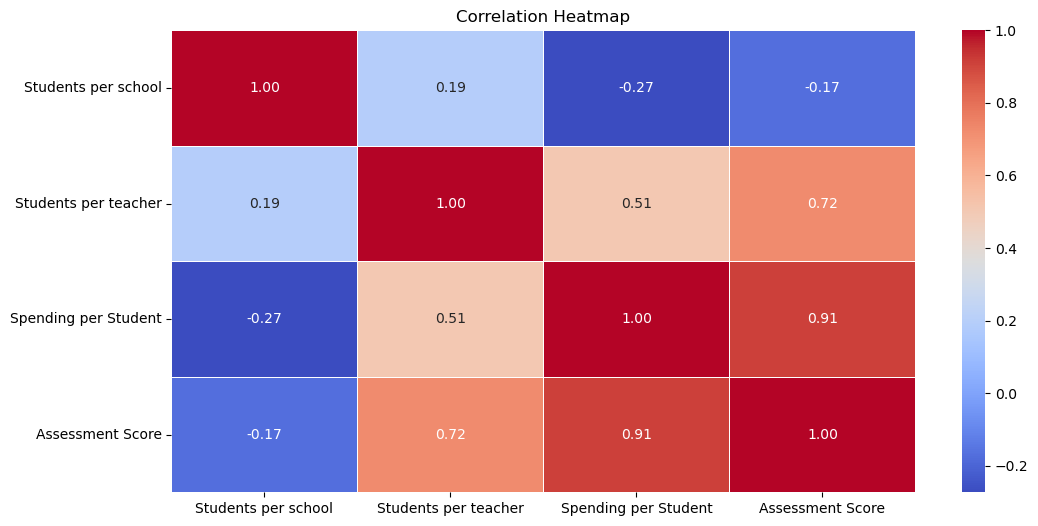

In [113]:
# Extracting columns needed
correlation_matrix = df[["Students per school", "Students per teacher", "Spending per Student", "Assessment Score"]]

# calculating the correlation matrix
correlation_matrix = correlation_matrix.corr()

# Visualization
plt.figure(figsize = (12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Insights

- Higher spending generally correlates with higher assessment scores
- Developed African economies receive the highest funding with an average of **8500** and also having the highest assessment scores with an average of **54**.
- The higher the students per teacher the higher the assessment score, this can be seen from the Developed African economies schools and Similar economies.
- Although government funding has an impact on the assessment score it is not completely since schools in similar economies received on average the lowest government funding but still has the second best average assessment score of **45** which might have been due to a high students per teacher.
- Nomantown’s spending is moderate, but its assessment scores are relatively low, suggesting potential inefficiencies

### Conclusions

- **Higher Spending Generally Leads to Higher Assessment Scores:**
 There is a positive correlation between government spending per student and assessment performance, indicating that increased funding often translates to better academic outcomes.
- **Developed African Economies Receive the Highest Funding and Achieve the Best Scores:**
 Schools in Developed African economies receive the highest average funding of **$8,500** per student and also achieve the highest average assessment score of **54**, reinforcing the link between investment in education and performance.
- **Higher Student-to-Teacher Ratios Are Associated with Higher Scores:**
 Contrary to common assumptions, a higher students-per-teacher ratio appears to be linked to better assessment scores. This is evident in Developed African economies and Similar economies, suggesting that teacher quality, instructional methods, or peer-driven learning may play a significant role in student success.
- **Government Funding Is Not the Only Determining Factor for Performance:**
 Schools in Similar economies receive the lowest average government funding but still achieve the second-highest assessment score **45**. This suggests that other factors—such as teacher effectiveness, school management, or alternative funding sources—contribute to educational outcomes.